# Map of sub-domain of ANHA12

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [3]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
import csv
import matplotlib.image as mpimg
import pickle
import pandas as pd

%matplotlib notebook

### Load relevant data

Bathymetry:

In [4]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = mesh.variables['nav_lon']
mesh_lat = mesh.variables['nav_lat']
mesh_bathy = mesh.variables['hdept'][0]

In [5]:
mesh_lon = np.array(mesh_lon)
mesh_lat = np.array(mesh_lat)
mesh_bathy = np.array(mesh_bathy)

In [6]:
cond2 = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

CAA station locations:

In [7]:
features = ['Beaufort Sea', 'Arctic Ocean', 'Kalaallit Nunaat','(Greenland)', 'Nunavut', \
           'Northwest','Territories']

<IPython.core.display.Javascript object>


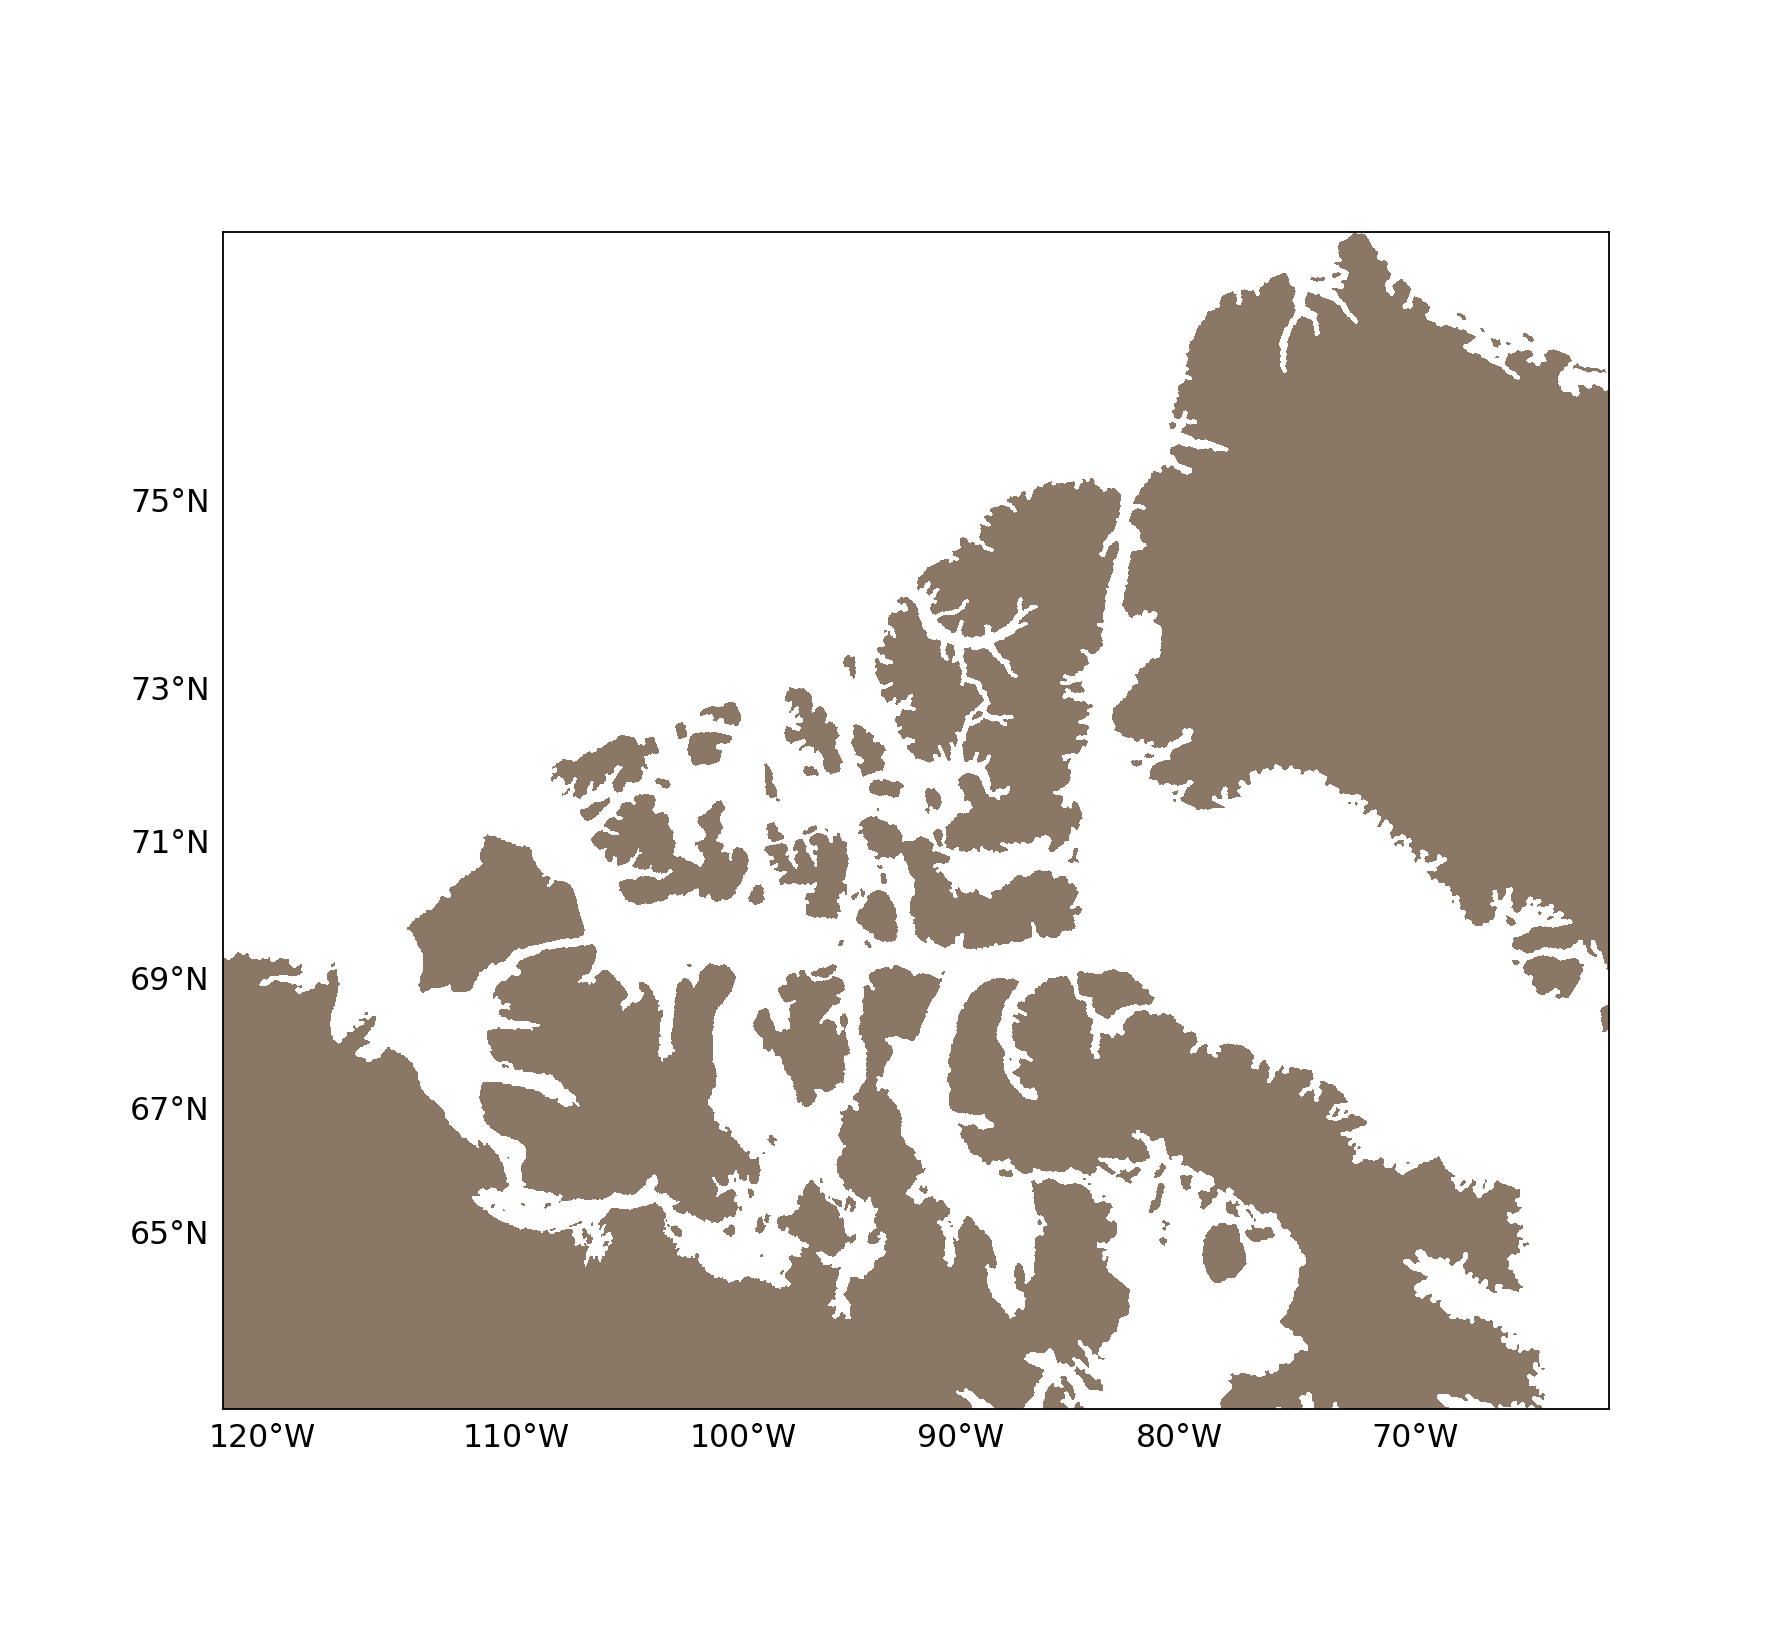

In [10]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

### Create plots

Show sub-domain in detail with the grid:

In [8]:
lon_features1 = [-149.5, -118, -48, -47, -112, -133, -131]
lat_features1 = [74.5, 88.5 , 74.5, 72.5, 65, 65, 64.5]

In [9]:
fig,ax = plt.subplots(figsize=(14,11))

proj=Basemap(projection='eqdc',lat_0 = 77.5, lon_0 = -85, resolution='i', width=4.5e6, height=2.88e6)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=2)

# bathymetry:
clevels=[0, 200, 400, 700, 1000, 2000, 3000, 4500]
x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
bath = proj.contourf(x_mesh, y_mesh, mesh_bathy,clevels, cmap=cmocean.cm.tempo, zorder=1)

x=x_mesh
y=y_mesh
res=5
# sub-domain:
# Northern (model Eastern) boundary
proj.plot(x[1480:2050:res,200:799:res], y[1480:2050:res,200:799:res], 'w-', lw=0.7, zorder=3)
proj.plot(x[1480:2050:res,200:799:res].T, y[1480:2050:res,200:799:res].T, 'w-', lw=0.7, zorder=3)

# features:
textx, texty = proj(lon_features1, lat_features1)
for i in range(len(features)):
    plt.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w', \
            zorder=4)

#---------------------
    
cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)

<IPython.core.display.Javascript object>

In [12]:
nv = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/nunavut.png')
nwt = mpimg.imread('/ocean/brogalla/GEOTRACES/figures/NWT.png')

In [10]:
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut', 'Beaufort Sea']
lon_features1 = [-139, -48, -47, \
                -132.5, -131.3, -105.5, -149.5]
lat_features1 = [88, 74.5, 73.1, \
                64.1, 63.4, 64, 74.5]

In [11]:
bath2 = proj.contourf(x_mesh, y_mesh, mesh_bathy, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

/home/brogalla/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:214: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


<IPython.core.display.Javascript object>


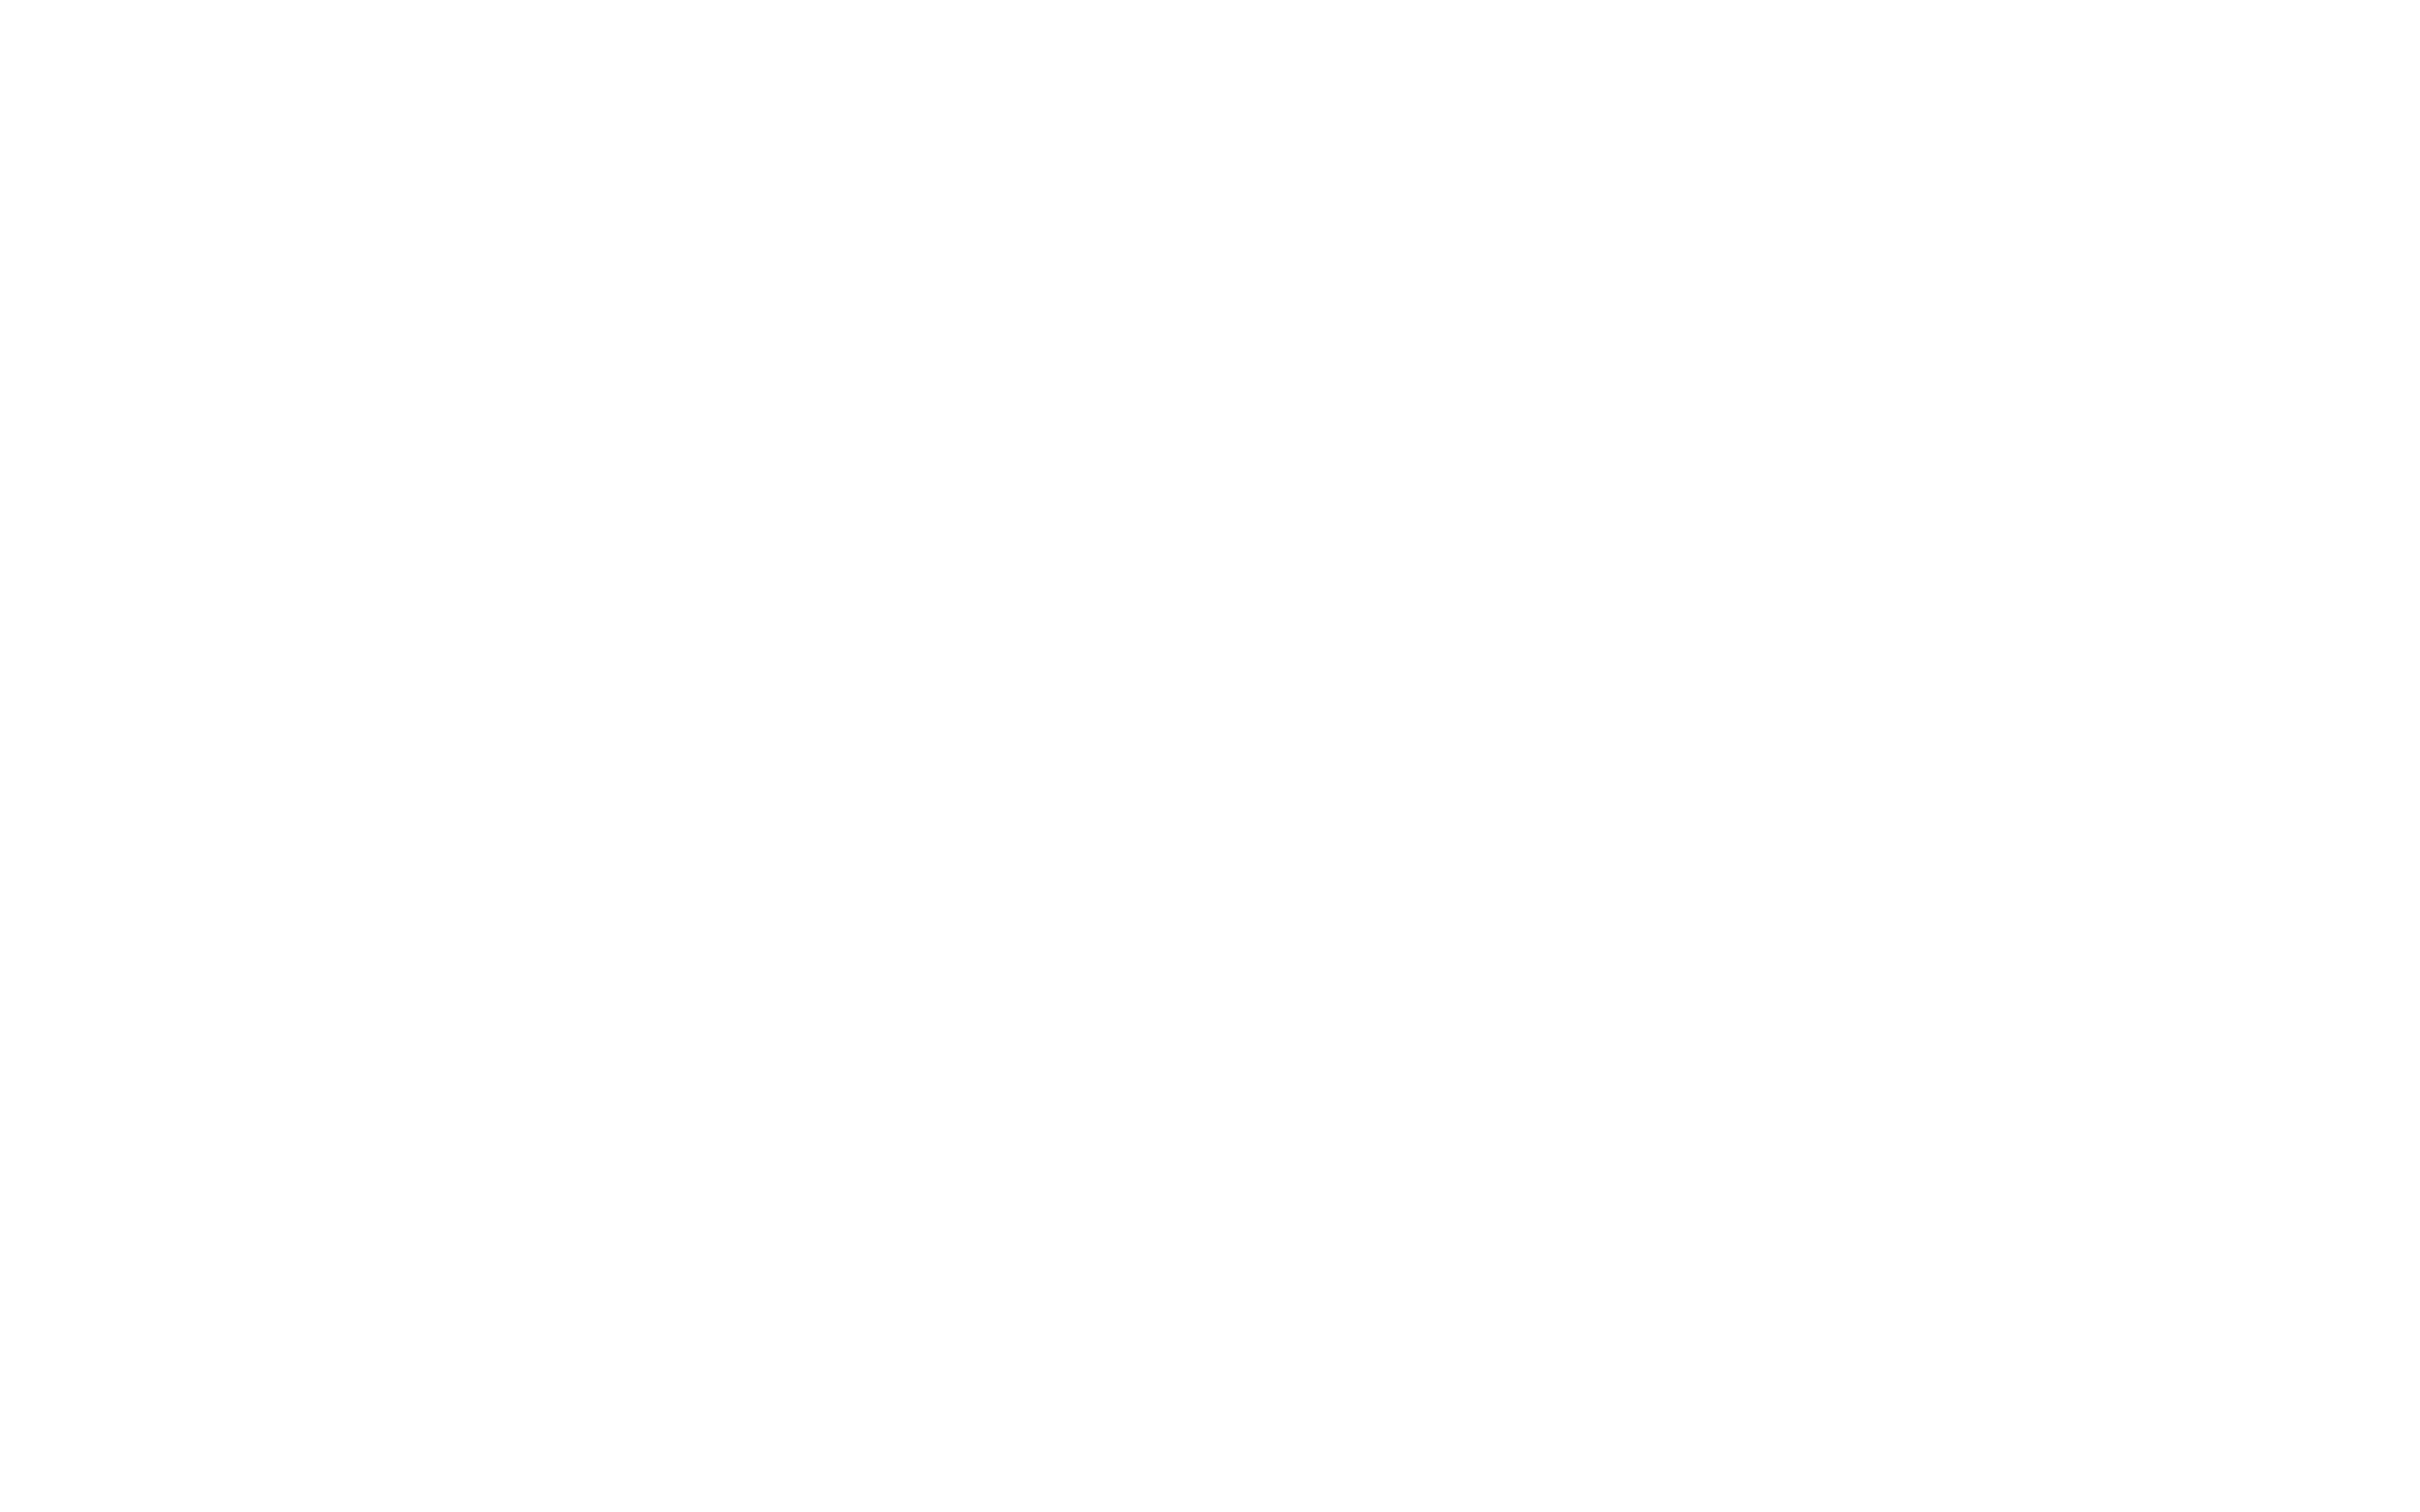

NameError: name 'nv' is not defined

In [12]:
fig, ax1 = plt.subplots(figsize=(16,10))
left, bottom, width, height = [0.63, 0.54, 0.37, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

# plot 1 --------------------
proj = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj.drawmapboundary(fill_color='white')
proj.drawparallels(np.arange(-90.,120.,30.),zorder=5)
proj.drawmeridians(np.arange(0.,420.,60.),zorder=5)
proj.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

x_mesh, y_mesh = proj(mesh_lon, mesh_lat) 
x = x_mesh
y = y_mesh

# full domain:
proj.plot(x[:,0]         , y[:,0]        , 'r--', lw=1.3,zorder=5)
proj.plot(x[:,0].T       , y[:,0].T      , 'r--', lw=1.3,zorder=5)
proj.plot(x[160:-1,-1]   , y[160:-1,-1]  , 'r--', lw=1.3,zorder=5)
proj.plot(x[160:-1,-1].T , y[160:-1,-1].T, 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:]        , y[-1,:]       , 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:].T      , y[-1,:].T     , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-160]    , y[0,0:-160]   , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-160].T  , y[0,0:-160].T , 'r--', lw=1.3,zorder=5)

# sub-domain:
proj.plot(x[1480:2050,799],   y[1480:2050,799],   'r-', lw=1.3,zorder=5)
proj.plot(x[1480:2050,799].T, y[1480:2050,799].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[1480:2050,160],   y[1480:2050,160],   'r-', lw=1.3,zorder=5)
proj.plot(x[1480:2050,160].T, y[1480:2050,160].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[1480,160:799],    y[1480,160:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[1480,160:799].T,  y[1480,160:799].T,  'r-', lw=1.3,zorder=5)
proj.plot(x[2050,160:799],    y[2050,160:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[2050,160:799].T,  y[2050,160:799].T,  'r-', lw=1.3,zorder=5)

# plot 2: ---------------------------

proj2 = Basemap(projection='stere',lat_0 = 77.5, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=2)

# bathymetry:
clevels2=20
x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)
bath = proj2.contourf(x_mesh, y_mesh, mesh_bathy, clevels2, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

x=x_mesh
y=y_mesh
res=10
# sub-domain:
# Northern (model Eastern) boundary
proj2.plot(x[1480:2060:res,160:810:res], y[1480:2060:res,160:810:res], 'w-', lw=0.7, zorder=3)
proj2.plot(x[1480:2060:res,160:810:res].T, y[1480:2060:res,160:810:res].T, 'w-', lw=0.7, zorder=3)

# sub-domain:
proj2.plot(x[1480:2050,799]   , y[1480:2050,799]   , 'r-', lw=1.3, zorder=3)
proj2.plot(x[1480:2050,799].T , y[1480:2050,799].T , 'r-', lw=1.3, zorder=3)
proj2.plot(x[1480:2050,160]   , y[1480:2050,160]   , 'r-', lw=1.3, zorder=3)
proj2.plot(x[1480:2050,160].T , y[1480:2050,160].T , 'r-', lw=1.3, zorder=3)
proj2.plot(x[1480,160:799]    , y[1480,160:799]    , 'r-', lw=1.3, zorder=3)
proj2.plot(x[1480,160:799].T  , y[1480,160:799].T  , 'r-', lw=1.3, zorder=3)
proj2.plot(x[2050,160:799]    , y[2050,160:799]    , 'r-', lw=1.3, zorder=3)
proj2.plot(x[2050,160:799].T  , y[2050,160:799].T  , 'r-', lw=1.3, zorder=3)

# features:
textx, texty = proj2(lon_features1, lat_features1)
for i in range(len(features)):
    if features[i] == 'Kalaallit Nunaat':
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', color='w', zorder=4)
    else:
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w',\
                zorder=4)
    
#nunavut:
ax3 = fig.add_axes([0.36, 0.18, 0.06, 0.04])
ax3.axis('off')
ax3.imshow(nv)
#northwest territories:
ax4 = fig.add_axes([0.17, 0.38, 0.10, 0.04])
ax4.axis('off')
ax4.imshow(nwt)

#---------------------
    
cbaxes = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)


<IPython.core.display.Javascript object>


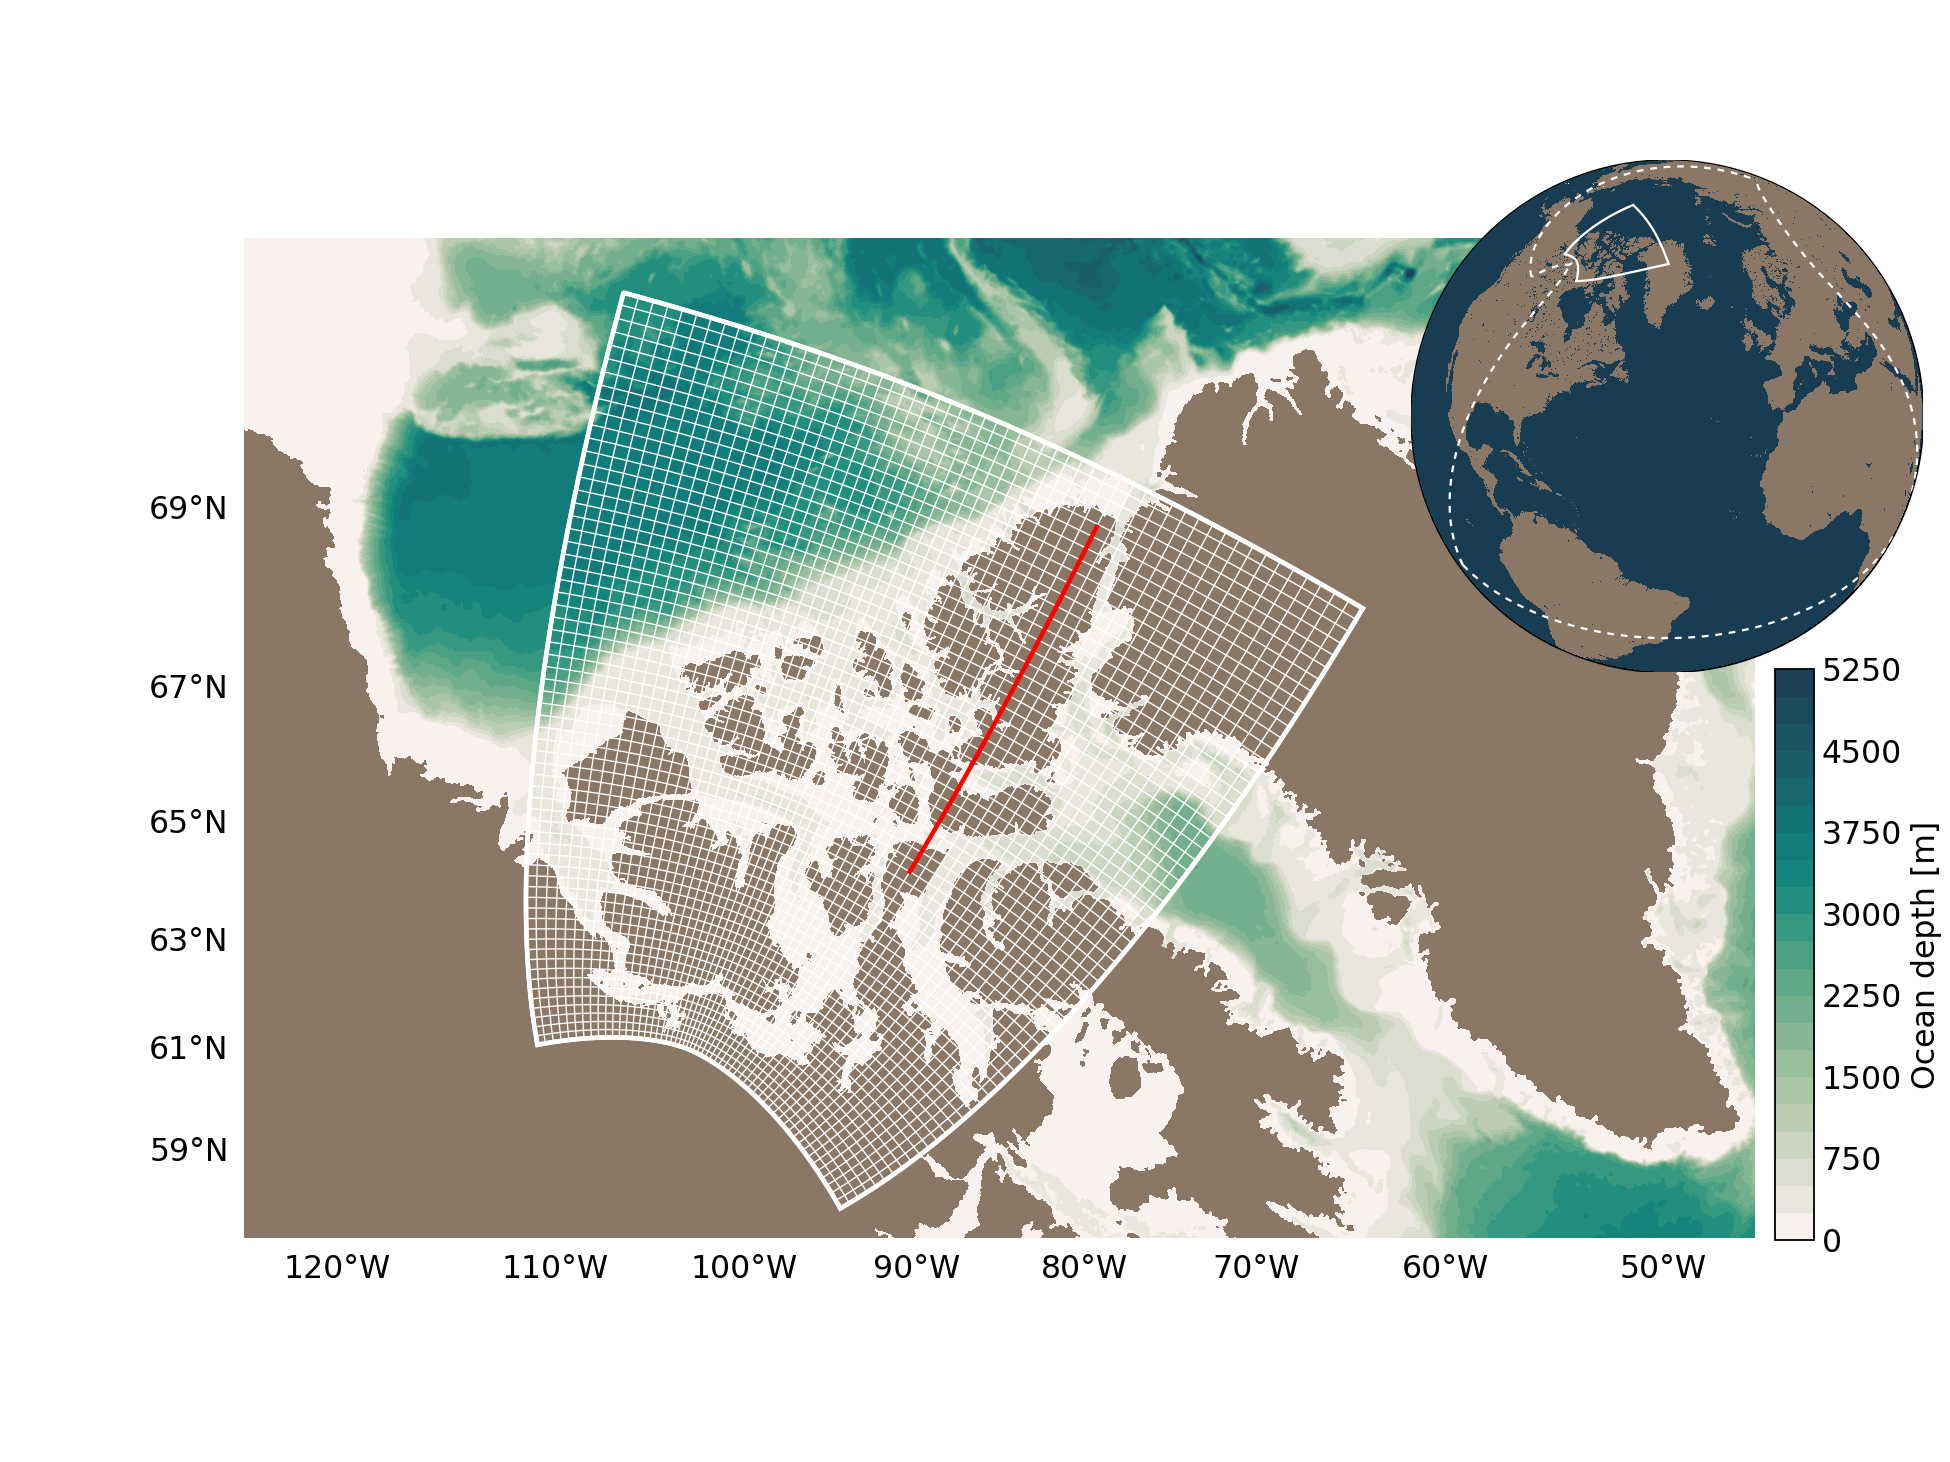

In [37]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map-globe.pickle','rb'))

# Globe: --------------------------------------------------------------------------------------
x, y  = proj2(mesh_lon, mesh_lat) 

res=10
# Sub-domain
proj2.plot(x[1480:2050,160], y[1480:2050,160]      , 'w-', lw=1,zorder=3)
proj2.plot(x[1480:2050,799], y[1480:2050,799]      , 'w-', lw=1,zorder=3)
proj2.plot(x[1480,160:800], y[1480,160:800]        , 'w-', lw=1,zorder=3)
proj2.plot(x[2050,160:800], y[2050,160:800]        , 'w-', lw=1,zorder=3)
# full domain
proj2.plot(x[0:-1:res,0] , y[0:-1:res,0]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[100:-1:res,-1], y[100:-1:res,-1]   , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[0,0:-1:res] , y[0,0:-1:res]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[-1,0:-1:res], y[-1,0:-1:res]       , 'w--', lw=1,zorder=3, dashes=(3, 3))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[1480:2050,799],   y_sub[1480:2050,799],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2050,799].T, y_sub[1480:2050,799].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2050,160],   y_sub[1480:2050,160],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2050,160].T, y_sub[1480:2050,160].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480,160:799],    y_sub[1480,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480,160:799].T,  y_sub[1480,160:799].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2050,160:799],    y_sub[2050,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2050,160:799].T,  y_sub[2050,160:799].T,  'w-', lw=2.0,zorder=5)

proj1.plot(x_sub[1660,440:759].T,  y_sub[1660,440:759].T,  'r-', lw=2.0,zorder=5)

proj1.plot(x_sub[1480:2060:res,160:810:res], y_sub[1480:2060:res,160:810:res], 'w-', lw=0.6, zorder=3);
proj1.plot(x_sub[1480:2060:res,160:810:res].T, y_sub[1480:2060:res,160:810:res].T, 'w-', lw=0.6, zorder=3);

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.91, 0.152, 0.02, 0.39]);
CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes); 
a    = CBar.set_label('Ocean depth [m]', fontsize=14)
CBar.ax.tick_params(axis='y', length=0, labelsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')

In [14]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons = Pb_data['station lon'].astype('float').dropna().values
lats = Pb_data['Station lat'].astype('float').dropna().values
profile_colors = ['#ff4949', '#01b9ff']

In [22]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 

proj1.plot(x_sub[1480:2050,799],   y_sub[1480:2050,799],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2050,799].T, y_sub[1480:2050,799].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2050,160],   y_sub[1480:2050,160],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480:2050,160].T, y_sub[1480:2050,160].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480,160:799],    y_sub[1480,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1480,160:799].T,  y_sub[1480,160:799].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2050,160:799],    y_sub[2050,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2050,160:799].T,  y_sub[2050,160:799].T,  'w-', lw=2.0,zorder=5)

# flux boundaries:
proj1.plot(x_sub[1935,450:530],  y_sub[1935,450:530],  '--k', dashes=(1.5, 0.8), lw=3.5)
proj1.plot(x_sub[1635:1653,760], y_sub[1635:1653,760], '--k', dashes=(1.5, 0.8), lw=3.5)
proj1.plot(x_sub[1520,505:673],  y_sub[1520,505:673],  '--k', dashes=(1.5, 0.8), lw=3.5)
proj1.plot(x_sub[1570:1630,635], y_sub[1570:1630,635], '--k', dashes=(1.5, 0.8), lw=3.5)
proj1.plot(x_sub[1585,485:538],  y_sub[1585,485:538],  '--k', dashes=(1.5, 0.8), lw=3.5)

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.91, 0.152, 0.02, 0.39]);
CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes); 
a    = CBar.set_label('Ocean depth [m]', fontsize=14)
CBar.ax.tick_params(axis='y', length=0, labelsize=14)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/time-series-sub-domain.eps', bbox_inches='tight', format='eps')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


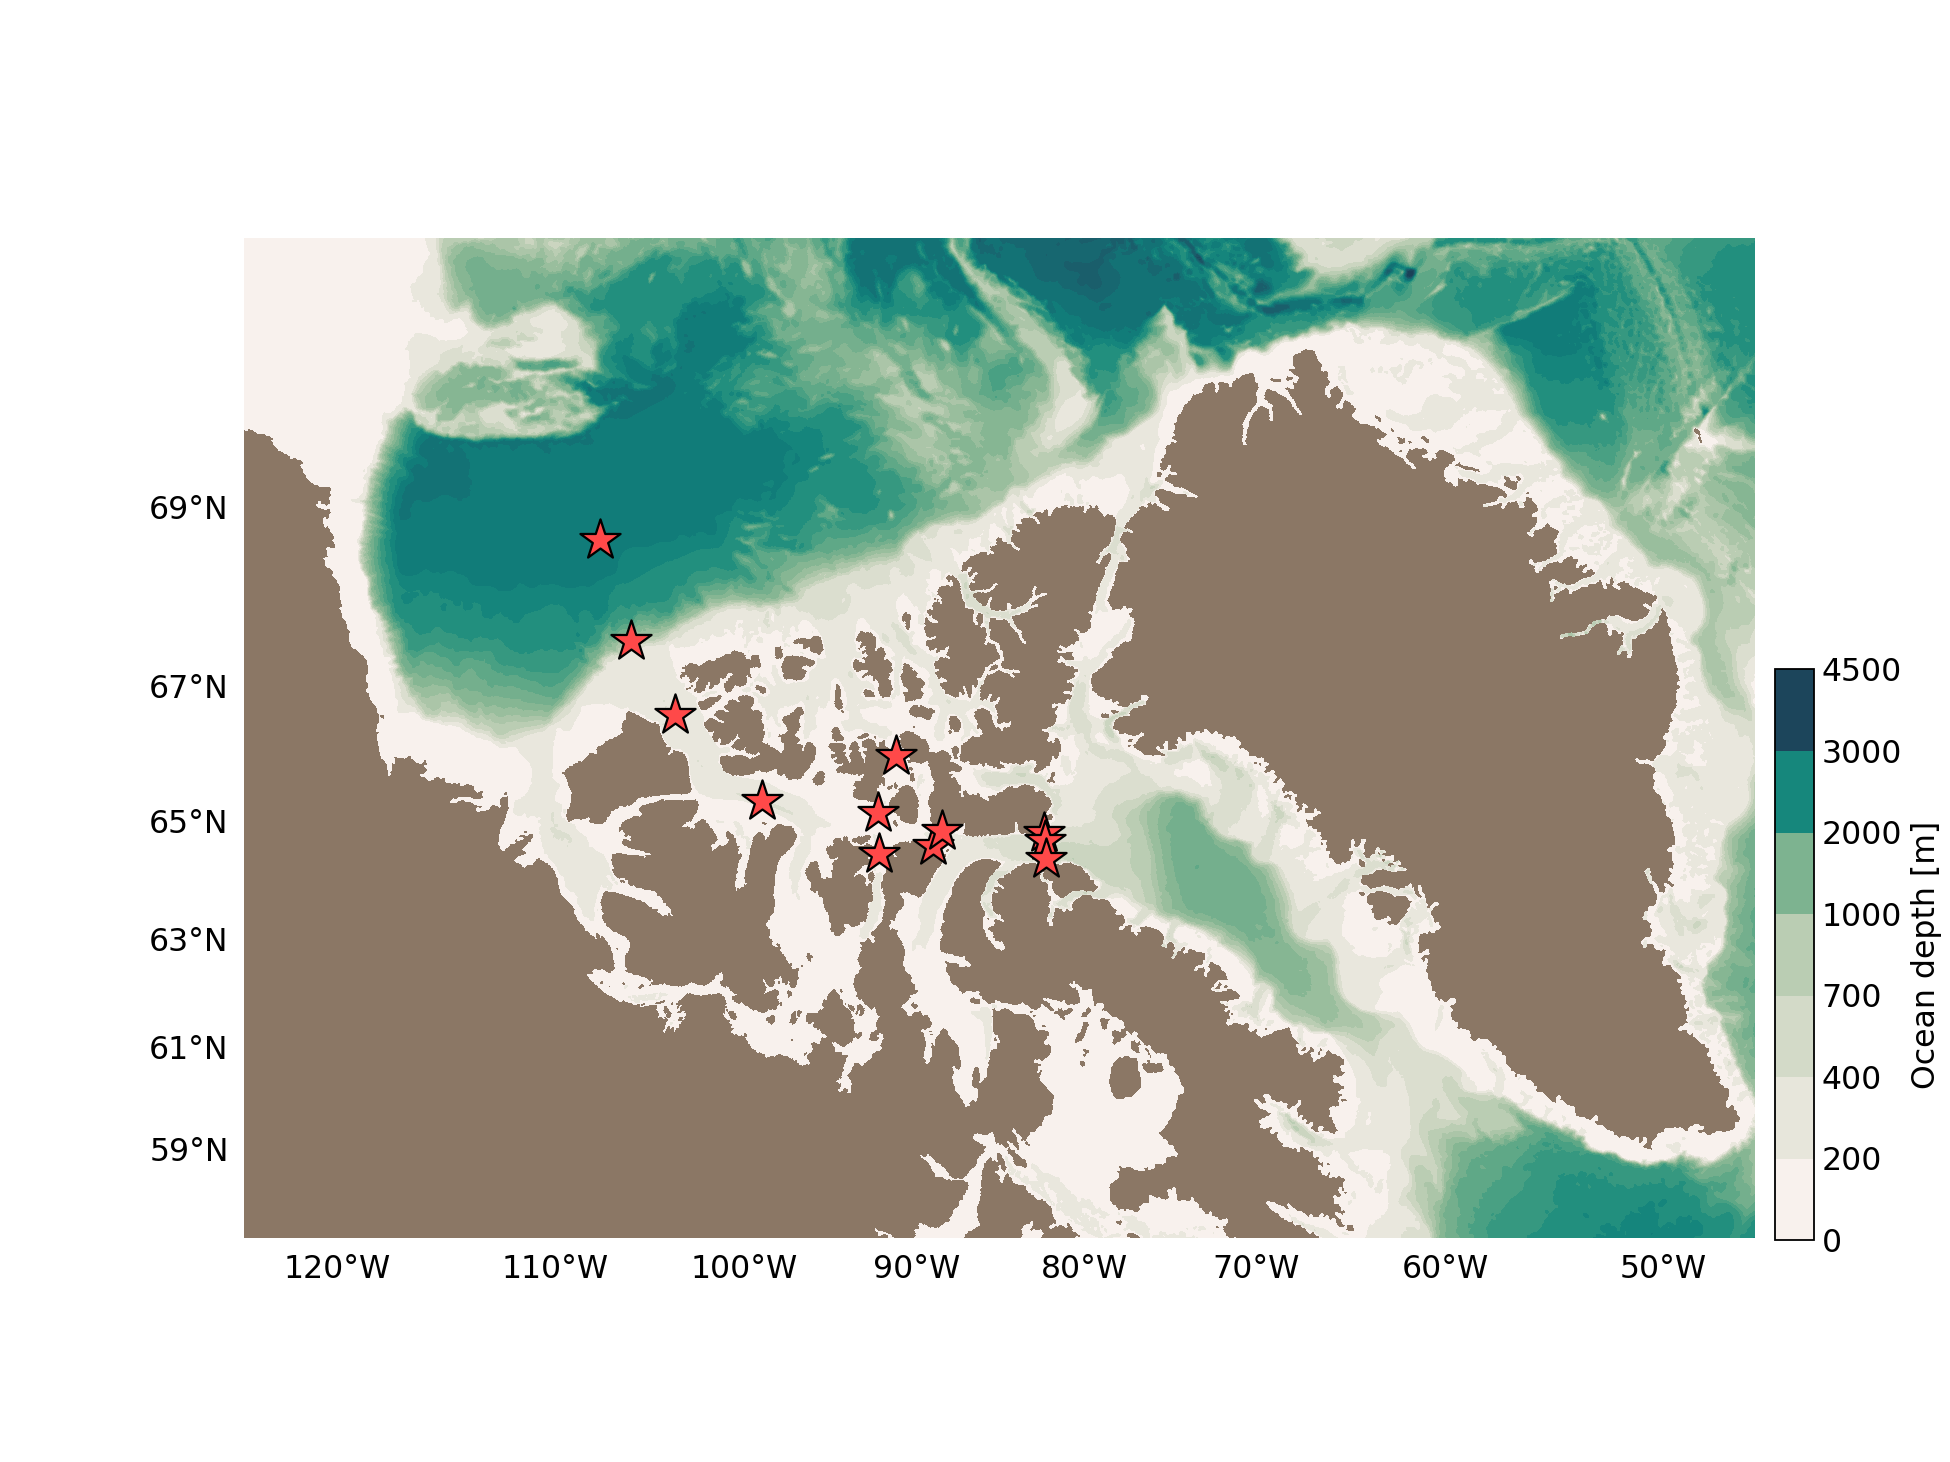

In [28]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-land-map.pickle','rb'))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 

x_GEOTRACES, y_GEOTRACES = proj1(lons[5:17], lats[5:17]) # leave out CB4, BB and K stations
ax1.scatter(x_GEOTRACES, y_GEOTRACES, marker='*',s=350,zorder=5, edgecolor='k', color=profile_colors[0])

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.91, 0.152, 0.02, 0.39]);
CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes); 
a    = CBar.set_label('Ocean depth [m]', fontsize=14)
CBar.ax.tick_params(axis='y', length=0, labelsize=14)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain-eval.eps', bbox_inches='tight', format='eps')

Barrow Sill seperation: [1660,440:759] --> [180, 280:599]

# Just the globe:

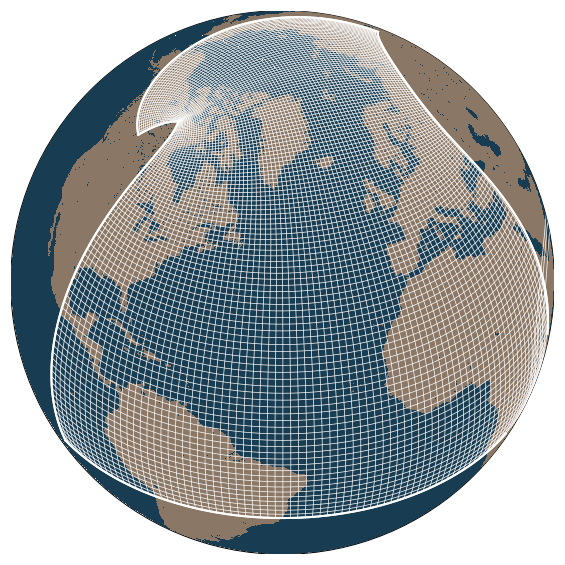

In [19]:
fig, ax1 = plt.subplots(figsize=(16,10))

proj = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax1)
proj.drawmapboundary(fill_color='white')
# proj.drawparallels(np.arange(-90.,120.,30.),zorder=5)
# proj.drawmeridians(np.arange(0.,420.,60.),zorder=5)
proj.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h',zorder=2) 

x_mesh, y_mesh = proj(mesh_lon, mesh_lat) 
x = x_mesh
y = y_mesh

# full domain:
proj.plot(x[:,0]         , y[:,0]        , 'w-', lw=2,zorder=5)
proj.plot(x[:,0].T       , y[:,0].T      , 'w-', lw=2,zorder=5)
proj.plot(x[200:-1,-1]   , y[200:-1,-1]  , 'w-', lw=2,zorder=5)
proj.plot(x[200:-1,-1].T , y[200:-1,-1].T, 'w-', lw=2,zorder=5)
proj.plot(x[-1,:]        , y[-1,:]       , 'w-', lw=2,zorder=5)
proj.plot(x[-1,:].T      , y[-1,:].T     , 'w-', lw=2,zorder=5)
proj.plot(x[0,0:-200]    , y[0,0:-200]   , 'w-', lw=2,zorder=5)
proj.plot(x[0,0:-200].T  , y[0,0:-200].T , 'w-', lw=2,zorder=5)

# grid:
res=20
proj.plot(x[0:-1:res,0:-1:res], y[0:-1:res,0:-1:res], 'w-', lw=0.7, zorder=3);
proj.plot(x[0:-1:res,0:-1:res].T, y[0:-1:res,0:-1:res].T, 'w-', lw=0.7, zorder=3);

fig.savefig('/ocean/brogalla/GEOTRACES/figures/ANHA12_globe.png', bbox_inches='tight')

# Extended sub-domain for Pb model

In [10]:
features = ['Arctic Ocean', 'Kalaallit Nunaat','Greenland', \
           'Northwest','Territories', 'Nunavut', 'Beaufort Sea']
lon_features1 = [-139, -48, -47, \
                -130.2, -128.9, -105.5, -149.5]
lat_features1 = [88, 74.5, 73.1, \
                64.2, 63.3, 63.5, 74.5]

<IPython.core.display.Javascript object>


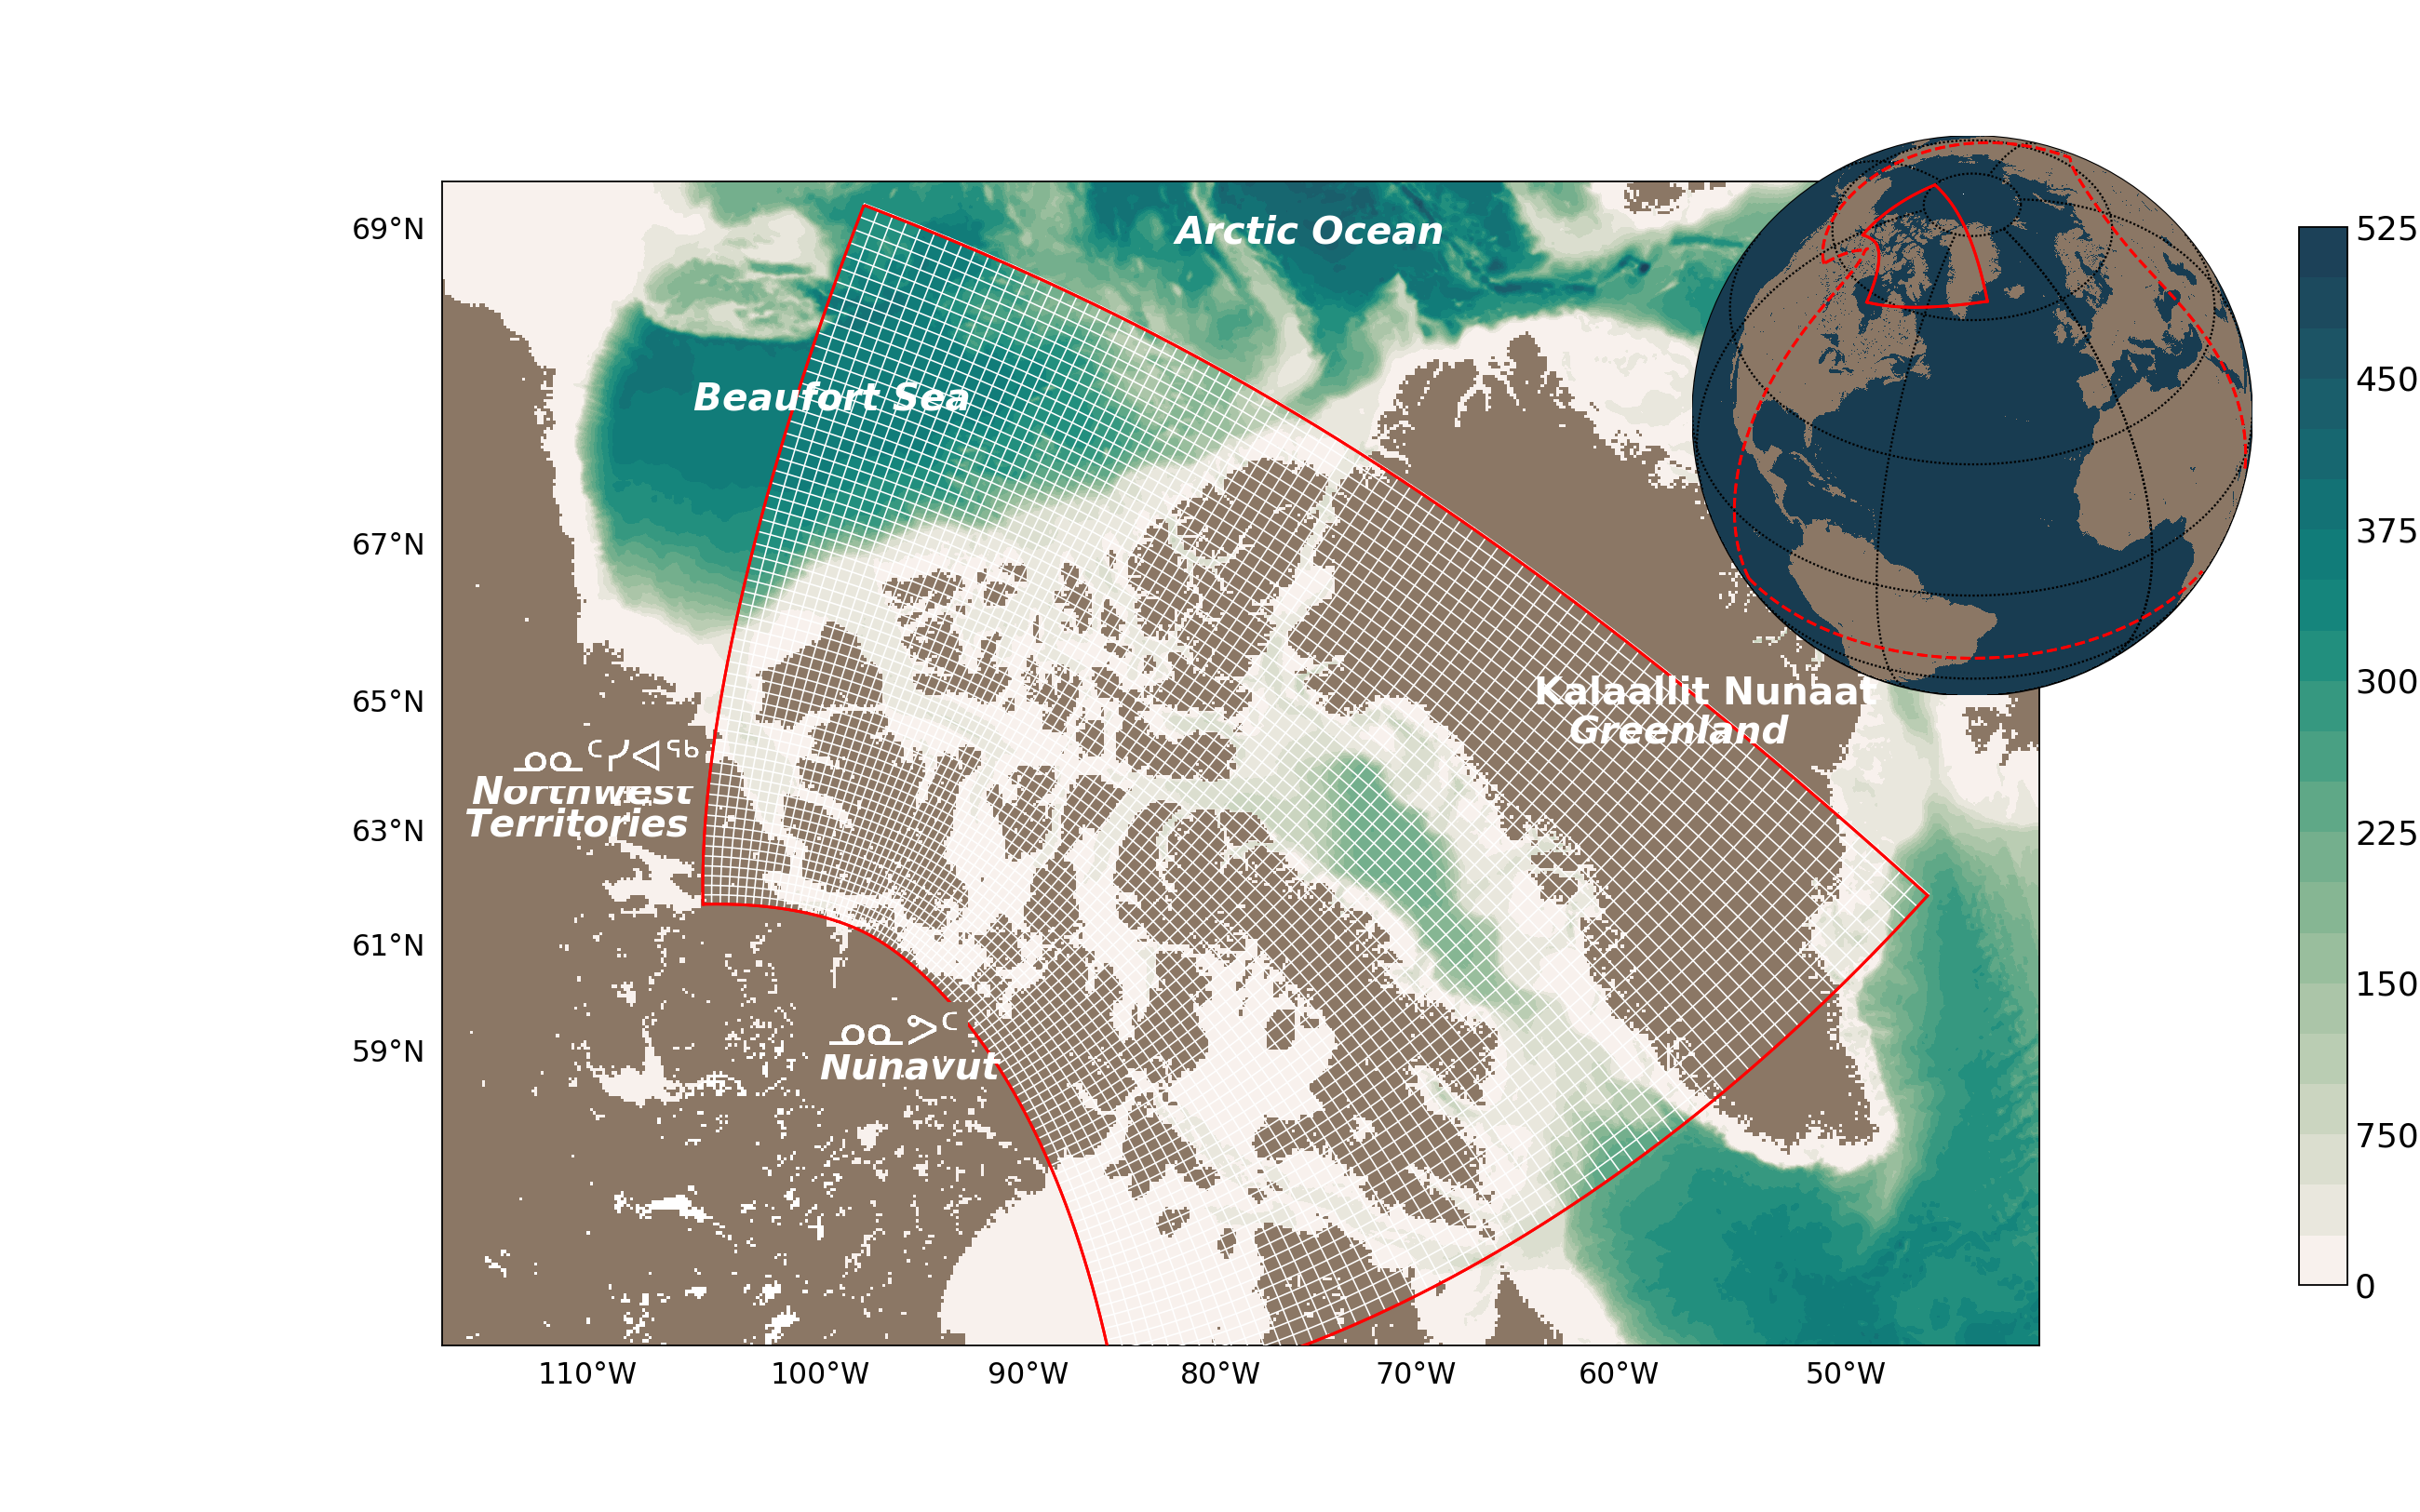

In [12]:
fig, ax1 = plt.subplots(figsize=(16,10))
left, bottom, width, height = [0.63, 0.54, 0.37, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

# plot 1 --------------------
proj = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj.drawmapboundary(fill_color='white')
proj.drawparallels(np.arange(-90.,120.,30.),zorder=5)
proj.drawmeridians(np.arange(0.,420.,60.),zorder=5)
proj.drawlsmask(land_color = "#8b7765", ocean_color="#183C51", resolution = 'h', zorder=3)

x_mesh, y_mesh = proj(mesh_lon, mesh_lat)
x = x_mesh
y = y_mesh

# full domain:
proj.plot(x[:,0]         , y[:,0]        , 'r--', lw=1.3,zorder=5)
proj.plot(x[:,0].T       , y[:,0].T      , 'r--', lw=1.3,zorder=5)
proj.plot(x[200:-1,-1]   , y[200:-1,-1]  , 'r--', lw=1.3,zorder=5)
proj.plot(x[200:-1,-1].T , y[200:-1,-1].T, 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:]        , y[-1,:]       , 'r--', lw=1.3,zorder=5)
proj.plot(x[-1,:].T      , y[-1,:].T     , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-200]    , y[0,0:-200]   , 'r--', lw=1.3,zorder=5)
proj.plot(x[0,0:-200].T  , y[0,0:-200].T , 'r--', lw=1.3,zorder=5)

# sub-domain:
l1=1200
proj.plot(x[l1:2050,799],   y[l1:2050,799],   'r-', lw=1.3,zorder=5)
proj.plot(x[l1:2050,799].T, y[l1:2050,799].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[l1:2050,200],   y[l1:2050,200],   'r-', lw=1.3,zorder=5)
proj.plot(x[l1:2050,200].T, y[l1:2050,200].T, 'r-', lw=1.3,zorder=5)
proj.plot(x[l1,200:799],    y[l1,200:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[l1,200:799].T,  y[l1,200:799].T,  'r-', lw=1.3,zorder=5)
proj.plot(x[2050,200:799],    y[2050,200:799],    'r-', lw=1.3,zorder=5)
proj.plot(x[2050,200:799].T,  y[2050,200:799].T,  'r-', lw=1.3,zorder=5)

# plot 2: ---------------------------

proj2 = Basemap(projection='stere',lat_0 = 75, lon_0 = -79, resolution='i', width=4.8e6, height=3.5e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=2)

# bathymetry:
clevels2=20
x_mesh, y_mesh = proj2(mesh_lon, mesh_lat)
bath = proj2.contourf(x_mesh, y_mesh, mesh_bathy, clevels2, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)
x=x_mesh
y=y_mesh
res=10

# sub-domain:
# Northern (model Eastern) boundary
proj2.plot(x[l1:2060:res,200:810:res], y[l1:2060:res,200:810:res], 'w-', lw=0.7, zorder=3)
proj2.plot(x[l1:2060:res,200:810:res].T, y[l1:2060:res,200:810:res].T, 'w-', lw=0.7, zorder=3)

# sub-domain:
proj2.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3, zorder=3)
proj2.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3, zorder=3)
proj2.plot(x[l1:2050,200]   , y[l1:2050,200]   , 'r-', lw=1.3, zorder=3)
proj2.plot(x[l1:2050,200].T , y[l1:2050,200].T , 'r-', lw=1.3, zorder=3)
proj2.plot(x[l1,200:799]    , y[l1,200:799]    , 'r-', lw=1.3, zorder=3)
proj2.plot(x[l1,200:799].T  , y[l1,200:799].T  , 'r-', lw=1.3, zorder=3)
proj2.plot(x[2050,200:799]    , y[2050,200:799]    , 'r-', lw=1.3, zorder=3)
proj2.plot(x[2050,200:799].T  , y[2050,200:799].T  , 'r-', lw=1.3, zorder=3)

# features:
textx, texty = proj2(lon_features1, lat_features1)
for i in range(len(features)):
    if features[i] == 'Kalaallit Nunaat':
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', color='w', zorder=4)
    else:
        ax1.text(textx[i], texty[i], features[i], fontsize=18, fontweight='bold', fontstyle='italic', color='w',\
                zorder=4)
    
#nunavut:
ax3 = fig.add_axes([0.34, 0.30, 0.06, 0.04])
ax3.axis('off')
ax3.imshow(nv)
#northwest territories:
ax4 = fig.add_axes([0.20, 0.48, 0.10, 0.04])
ax4.axis('off')
ax4.imshow(nwt)

#---------------------
    
cbaxes = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 

CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes) 
a = CBar.set_label('Ocean depth [m]', fontsize=16)
CBar.ax.tick_params(axis='y', length=0, labelsize=16)

<IPython.core.display.Javascript object>


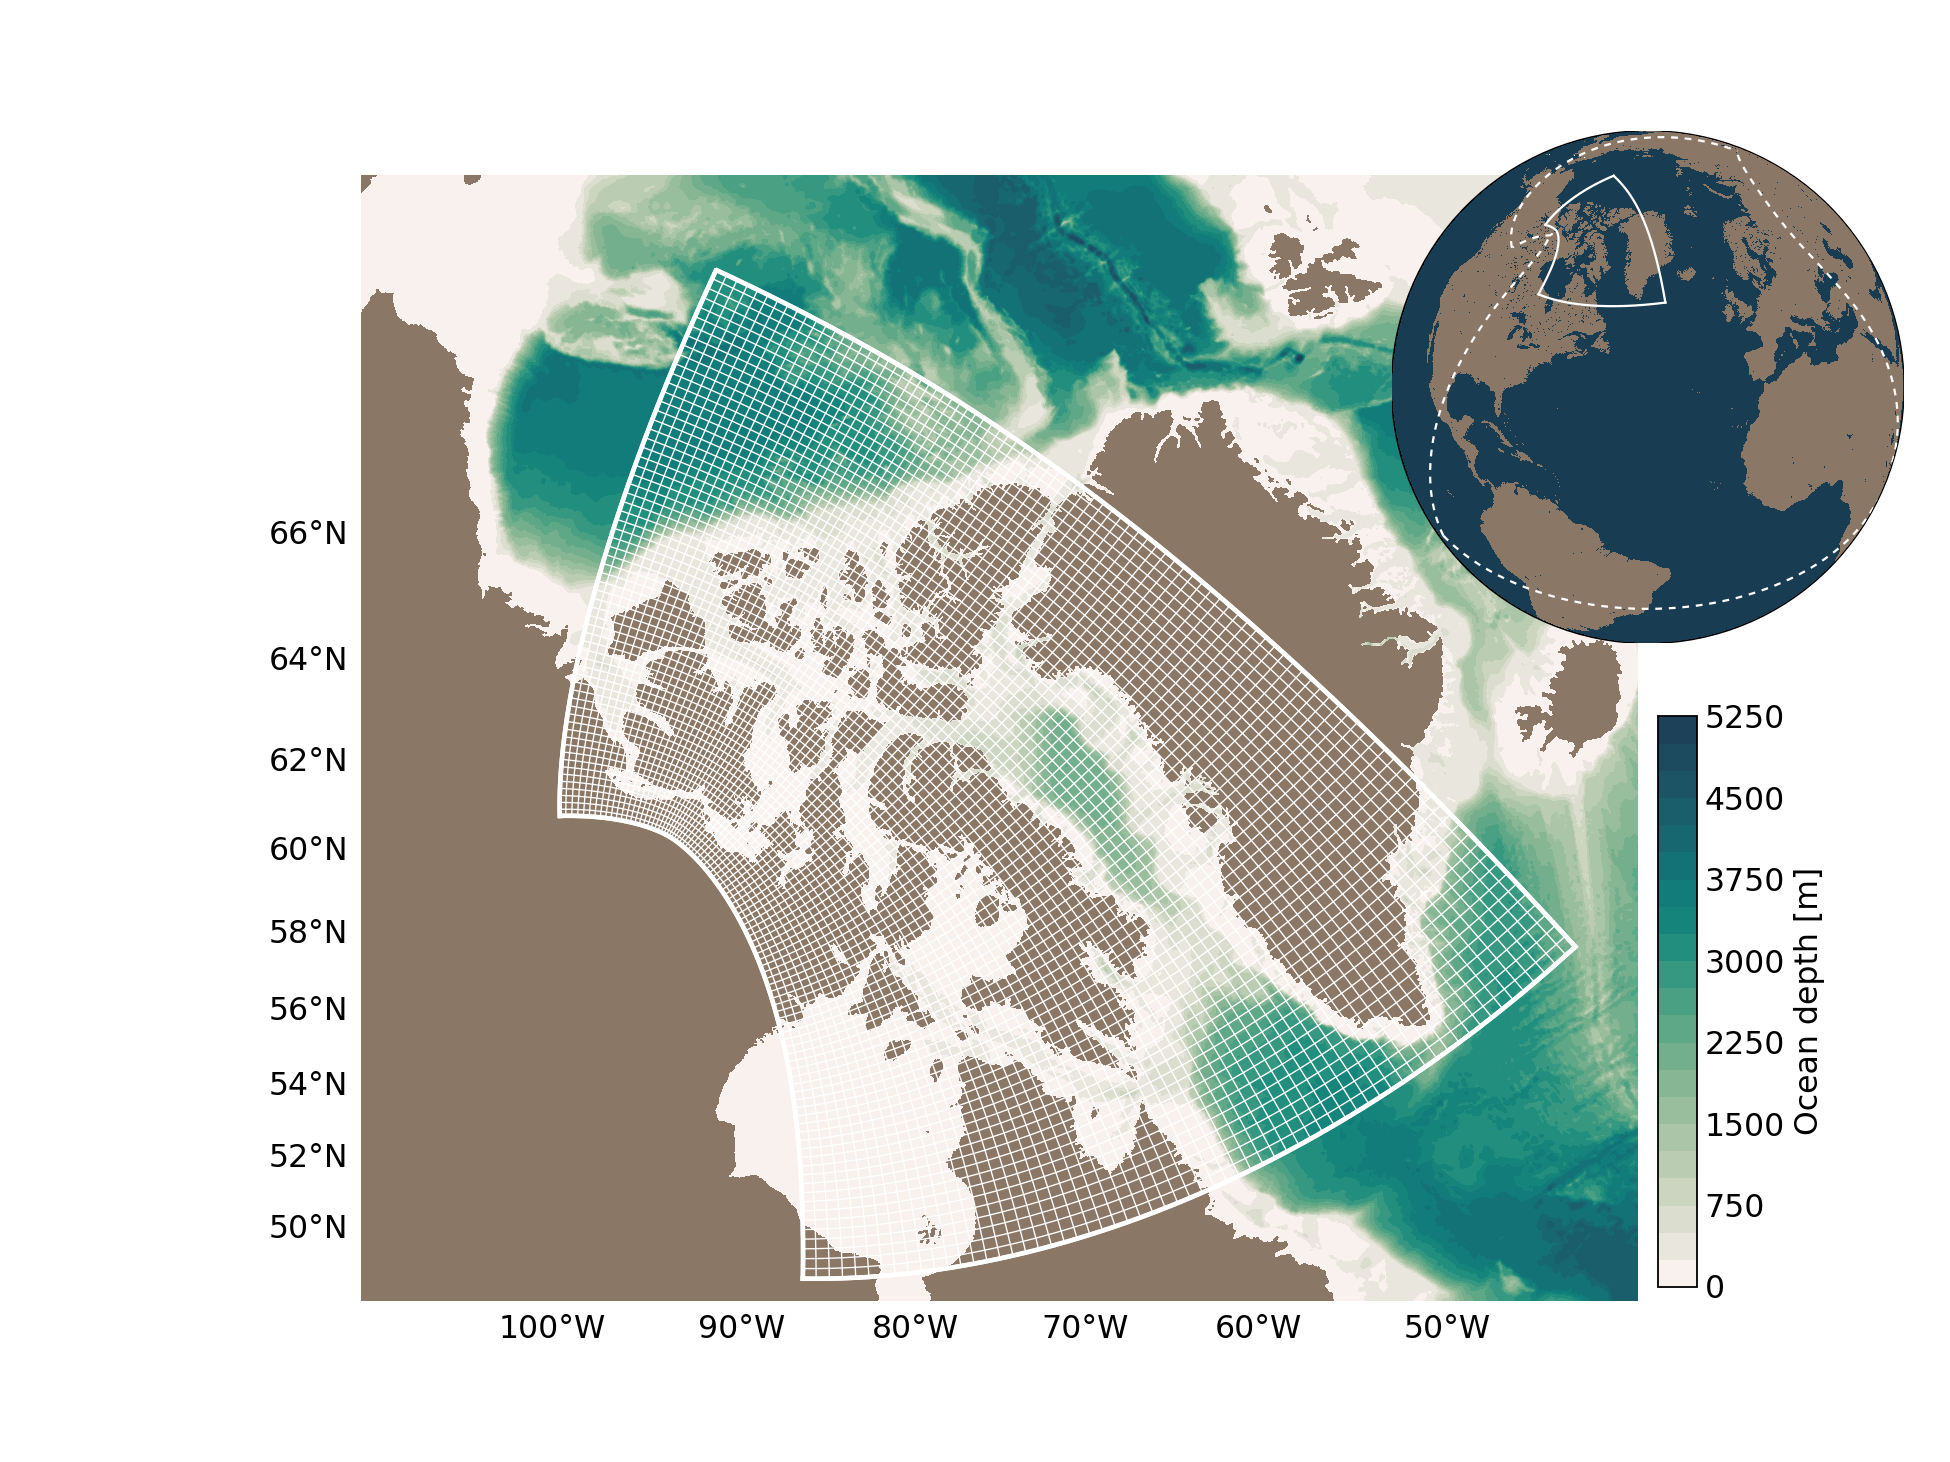

In [26]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/' + \
                                               'surface-Pb-map-globe.pickle','rb'))

# Globe: --------------------------------------------------------------------------------------
x, y  = proj2(mesh_lon, mesh_lat) 

res=10
# Sub-domain
proj2.plot(x[1100:2050,160], y[1100:2050,160]      , 'w-', lw=1,zorder=3)
proj2.plot(x[1100:2050,799], y[1100:2050,799]      , 'w-', lw=1,zorder=3)
proj2.plot(x[1100,160:800], y[1100,160:800]        , 'w-', lw=1,zorder=3)
proj2.plot(x[2050,160:800], y[2050,160:800]        , 'w-', lw=1,zorder=3)
# full domain
proj2.plot(x[0:-1:res,0] , y[0:-1:res,0]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[100:-1:res,-1], y[100:-1:res,-1]   , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[0,0:-1:res] , y[0,0:-1:res]        , 'w--', lw=1,zorder=3, dashes=(3, 3))
proj2.plot(x[-1,0:-1:res], y[-1,0:-1:res]       , 'w--', lw=1,zorder=3, dashes=(3, 3))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[1100:2050,799],   y_sub[1100:2050,799],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1100:2050,799].T, y_sub[1100:2050,799].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1100:2050,160],   y_sub[1100:2050,160],   'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1100:2050,160].T, y_sub[1100:2050,160].T, 'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1100,160:799],    y_sub[1100,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[1100,160:799].T,  y_sub[1100,160:799].T,  'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2050,160:799],    y_sub[2050,160:799],    'w-', lw=2.0,zorder=5)
proj1.plot(x_sub[2050,160:799].T,  y_sub[2050,160:799].T,  'w-', lw=2.0,zorder=5)

proj1.plot(x_sub[1100:2060:res,160:810:res], y_sub[1100:2060:res,160:810:res], 'w-', lw=0.6, zorder=3);
proj1.plot(x_sub[1100:2060:res,160:810:res].T, y_sub[1100:2060:res,160:810:res].T, 'w-', lw=0.6, zorder=3);

# Color bar: --------------------------------------------------------------------------------
cbaxes = fig.add_axes([0.85, 0.12, 0.02, 0.39]);
CBar = plt.colorbar(bath, ax=ax1, cax=cbaxes); 
a    = CBar.set_label('Ocean depth [m]', fontsize=14)
CBar.ax.tick_params(axis='y', length=0, labelsize=14)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain-Pb.png', bbox_inches='tight')